<a href="https://colab.research.google.com/github/SaraAcet/Beslenme.php/blob/main/derikanseriiiiii_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
"""



# TensorFlow kütüphanesini içe aktarır
import tensorflow as tf

# Keras uygulamalarından ResNet50 modelini içe aktarır
from tensorflow.keras.applications import ResNet50

# Keras katmanlarından farklı katman türlerini içe aktarır (Dense, Flatten, Conv2D, vb.)
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout

# Keras Model ve Sequential sınıflarını içe aktarır
from tensorflow.keras.models import Model, Sequential

# Görsel veri ön işleme için ImageDataGenerator sınıfını içe aktarır
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adam optimizasyon algoritmasını içe aktarır
from tensorflow.keras.optimizers import Adam

# Sklearn kütüphanesinden doğruluk raporları ve karışıklık matrisi için gerekli fonksiyonları içe aktarır
from sklearn.metrics import classification_report, confusion_matrix

# NumPy kütüphanesini içe aktarır (sayısal işlemler için)
import numpy as np

# Matplotlib kütüphanesini içe aktarır (grafik ve görselleştirme için)
import matplotlib.pyplot as plt

# Google Colab ile Google Drive'a bağlanmak için gerekli fonksiyonları içe aktarır
from google.colab import drive

# Google Drive'ı bağlar ve erişim sağlar
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
"""
data_dir = '/content/drive/My Drive/projeee/kanserr/'

# ImageDataGenerator ile veri artırma ve normalizasyon
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
"""



# Veri setinin bulunduğu klasör yolunu belirtir
data_dir = '/content/drive/My Drive/projeee/kanserr/'

# ImageDataGenerator ile veri artırma ve normalizasyon işlemi başlatılır
# rescale=1./255, piksel değerlerini 0-1 aralığına normalize eder
# validation_split=0.2, verilerin %20'sini doğrulama seti olarak ayırır
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_generator = datagen.flow_from_directory(
    data_dir, # Eğitim verisini yükler ve belirtilen veri dizininden alır
    target_size=(224, 224), # target_size=(224, 224), her resmi 224x224 boyutuna yeniden boyutlandırır
    batch_size=32, # batch_size=32, her seferinde 32 örnek alınacak şekilde veri yükler
    class_mode='categorical',# class_mode='categorical', çok sınıflı sınıflandırma için etiketlerin kategorik olacağını belirtir
    subset='training' # subset='training', verinin eğitim kısmı için veri kümesini ayırır
)


validation_generator = datagen.flow_from_directory(
    data_dir, # Doğrulama verisini yükler ve belirtilen veri dizininden alır
    target_size=(224, 224), # target_size=(224, 224), her resmi 224x224 boyutuna yeniden boyutlandırır
    batch_size=32, # batch_size=32, her seferinde 32 örnek alınacak şekilde veri yükler
    class_mode='categorical',# class_mode='categorical', çok sınıflı sınıflandırma için etiketlerin kategorik olacağını belirtir
    subset='validation'# subset='validation', verinin doğrulama kısmı için veri kümesini ayırır
)


Found 2238 images belonging to 2 classes.
Found 559 images belonging to 2 classes.


In [ ]:
"""
# ResNet50 Modeli
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_resnet = base_model_resnet.output
x_resnet = Flatten()(x_resnet)
x_resnet = Dense(1024, activation='relu')(x_resnet)
predictions_resnet = Dense(train_generator.num_classes, activation='softmax')(x_resnet)

model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

for layer in base_model_resnet.layers:
    layer.trainable = False

model_resnet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# AlexNet Modeli
model_alexnet = Sequential()

model_alexnet.add(Conv2D(96, (11, 11), input_shape=(224, 224, 3), strides=4, padding='valid'))
model_alexnet.add(Activation('relu'))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))

model_alexnet.add(Conv2D(256, (5, 5), padding='same'))
model_alexnet.add(Activation('relu'))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))

model_alexnet.add(Conv2D(384, (3, 3), padding='same'))
model_alexnet.add(Activation('relu'))

model_alexnet.add(Conv2D(384, (3, 3), padding='same'))
model_alexnet.add(Activation('relu'))

model_alexnet.add(Conv2D(256, (3, 3), padding='same'))
model_alexnet.add(Activation('relu'))
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))

model_alexnet.add(Flatten())
model_alexnet.add(Dense(4096))
model_alexnet.add(Activation('relu'))
model_alexnet.add(Dropout(0.5))

model_alexnet.add(Dense(4096))
model_alexnet.add(Activation('relu'))
model_alexnet.add(Dropout(0.5))

model_alexnet.add(Dense(train_generator.num_classes))
model_alexnet.add(Activation('softmax'))

model_alexnet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

"""


# ResNet50 modelini yükler, ImageNet ağırlıklarıyla önceden eğitilmiş bir model kullanır
# include_top=False, üst sınıflandırıcıyı (fully connected layers) dahil etmez, sadece temel model kullanılır
# input_shape=(224, 224, 3), giriş boyutunu belirtir (224x224 piksel, 3 renk kanalı)
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Temel modelin çıktı katmanını alır
x_resnet = base_model_resnet.output

# Çıktıyı düzleştirir (Flatten), çünkü sonrasında tam bağlantılı katmanlara geçilecek
x_resnet = Flatten()(x_resnet)

# 1024 nöronlu bir tam bağlantılı (dense) katman ekler, aktivasyon fonksiyonu olarak 'relu' kullanır
x_resnet = Dense(1024, activation='relu')(x_resnet)

# Modelin son katmanını ekler, 'softmax' aktivasyonu ile çok sınıflı sınıflandırma yapılır
predictions_resnet = Dense(train_generator.num_classes, activation='softmax')(x_resnet)

# Son modeli tanımlar, giriş olarak base_model_resnet'in girişini, çıkış olarak predictions_resnet'i kullanır
model_resnet = Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# ResNet50'deki tüm katmanları sabitler (eğitilmez), sadece kendi eklediğimiz katmanlar eğitilecektir
for layer in base_model_resnet.layers:
    layer.trainable = False

# Modeli derler, Adam optimizasyon algoritması ile öğrenme oranı 0.001 belirler
# Kayıp fonksiyonu olarak 'categorical_crossentropy' kullanılır çünkü çok sınıflı sınıflandırma problemi var
# 'accuracy' metriği modelin doğruluğunu takip eder
model_resnet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



# AlexNet modelini tanımlamaya başlar (Sequential model kullanılır)
model_alexnet = Sequential()

# İlk evrişim katmanı: 96 filtre, 11x11 çekirdek boyutu, stride=4 ile daha büyük bir adım
# padding='valid' ile görüntüyü kenarlardan kesmeden çıkartır
model_alexnet.add(Conv2D(96, (11, 11), input_shape=(224, 224, 3), strides=4, padding='valid'))

# ReLU aktivasyon fonksiyonunu ekler
model_alexnet.add(Activation('relu'))

# İlk max pooling katmanı: 3x3 havuzlama, stride=2 ile her iki yönü de 2 adımda kaydırır
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# İkinci evrişim katmanı: 256 filtre, 5x5 çekirdek boyutu, padding='same' ile aynı boyutta kalır
model_alexnet.add(Conv2D(256, (5, 5), padding='same'))

# ReLU aktivasyon fonksiyonunu ekler
model_alexnet.add(Activation('relu'))

# İkinci max pooling katmanı
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# Üçüncü evrişim katmanı: 384 filtre, 3x3 çekirdek boyutu
model_alexnet.add(Conv2D(384, (3, 3), padding='same'))

# ReLU aktivasyon fonksiyonunu ekler
model_alexnet.add(Activation('relu'))

# Dördüncü evrişim katmanı: 384 filtre, 3x3 çekirdek boyutu
model_alexnet.add(Conv2D(384, (3, 3), padding='same'))

# ReLU aktivasyon fonksiyonunu ekler
model_alexnet.add(Activation('relu'))

# Beşinci evrişim katmanı: 256 filtre, 3x3 çekirdek boyutu
model_alexnet.add(Conv2D(256, (3, 3), padding='same'))

# ReLU aktivasyon fonksiyonunu ekler
model_alexnet.add(Activation('relu'))

# Üçüncü max pooling katmanı
model_alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=2))

# Flatten: Evrişim katmanlarının çıktısını tek bir vektör haline getirir (tam bağlantılı katman için)
model_alexnet.add(Flatten())

# 4096 nöronlu bir tam bağlantılı katman ekler
model_alexnet.add(Dense(4096))

# ReLU aktivasyon fonksiyonunu ekler
model_alexnet.add(Activation('relu'))

# Dropout ekler: Ağırlıkların %50'sini rastgele sıfırlar, overfitting'i engellemek için
model_alexnet.add(Dropout(0.5))

# 4096 nöronlu bir başka tam bağlantılı katman ekler
model_alexnet.add(Dense(4096))

# ReLU aktivasyon fonksiyonunu ekler
model_alexnet.add(Activation('relu'))

# Yine Dropout ekler
model_alexnet.add(Dropout(0.5))

# Çıkış katmanı: 'train_generator.num_classes' kadar nöron (sınıf sayısı kadar)
# Softmax aktivasyonu ile çok sınıflı sınıflandırma yapılır
model_alexnet.add(Dense(train_generator.num_classes))

# Softmax aktivasyon fonksiyonunu ekler
model_alexnet.add(Activation('softmax'))

# Modeli derler, Adam optimizasyon algoritması ile öğrenme oranı 0.001 belirler
# Kayıp fonksiyonu olarak 'categorical_crossentropy' kullanılır çünkü çok sınıflı sınıflandırma problemi var
# 'accuracy' metriği modelin doğruluğunu takip eder
model_alexnet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
"""

# ResNet50 Modeli Eğitimi
history_resnet = model_resnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)

# AlexNet Modeli Eğitimi
history_alexnet = model_alexnet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=5
)
"""


# ResNet50 modelini eğitim verisiyle eğitir.
# train_generator, eğitim verisi sağlayıcısıdır ve eğitim verilerini verir.
# steps_per_epoch, her epoch başına kaç adım (batch) yapılacağını belirler.
# Burada, eğitim veri kümesindeki örnek sayısının batch boyutuna bölümüyle hesaplanır.
history_resnet = model_resnet.fit(
    train_generator,  # Eğitim verisi kaynağı
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Her epoch'ta kaç adım yapılacağı
    validation_data=validation_generator,  # Doğrulama verisi kaynağı
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Her epoch'ta doğrulama için kaç adım yapılacağı
    epochs=5  # Modeli 5 epoch boyunca eğitir
)


# AlexNet modelini eğitim verisiyle eğitir.
# train_generator, eğitim verisi sağlayıcısıdır ve eğitim verilerini verir.
# steps_per_epoch, her epoch başına kaç adım (batch) yapılacağını belirler.
# Burada, eğitim veri kümesindeki örnek sayısının batch boyutuna bölümüyle hesaplanır.
history_alexnet = model_alexnet.fit(
    train_generator,  # Eğitim verisi kaynağı
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Her epoch'ta kaç adım yapılacağı
    validation_data=validation_generator,  # Doğrulama verisi kaynağı
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Her epoch'ta doğrulama için kaç adım yapılacağı
    epochs=5  # Modeli 5 epoch boyunca eğitir
)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 748s 10s/step - accuracy: 0.4965 - loss: 10.0659 - val_accuracy: 0.4651 - val_loss: 0.7242
Epoch 2/5
 1/69 ━━━━━━━━━━━━━━━━━━━━ 7:59 7s/step - accuracy: 0.4688 - loss: 0.7150

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.4688 - loss: 0.7150 - val_accuracy: 0.4000 - val_loss: 0.7332
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 746s 10s/step - accuracy: 0.5123 - loss: 0.6979 - val_accuracy: 0.5294 - val_loss: 0.6903
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.6250 - loss: 0.6853 - val_accuracy: 0.5333 - val_loss: 0.6790
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 718s 10s/step - accuracy: 0.5674 - loss: 0.6862 - val_accuracy: 0.4724 - val_loss: 0.6953
Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 404s 6s/step - accuracy: 0.5578 - loss: 1.0376 - val_accuracy: 0.5368 - val_loss: 0.6906
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.5938 - loss: 0.6853 - val_accuracy: 0.5333 - val_loss: 0.6910
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 420s 6s/step - accuracy: 0.5387 - loss: 0.6901 - val_accuracy: 0.5386 - val_loss: 0.6911
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.5312 - loss: 0.6925 - val_accuracy: 0.4667 - val_loss: 0

18/18 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.5511 - loss: 0.6722
ResNet50 - Validation Loss: 0.6782422661781311
ResNet50 - Validation Accuracy: 0.5635062456130981
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5560 - loss: 0.6898
AlexNet - Validation Loss: 0.6911886930465698
AlexNet - Validation Accuracy: 0.5366726517677307


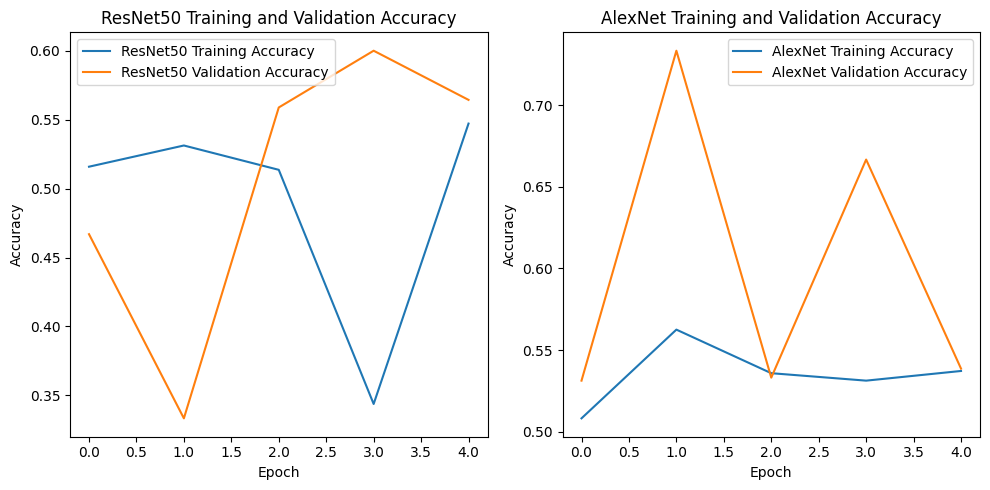

In [ ]:
"""

#ResNet50 Modeli Değerlendirmesi
loss_resnet, accuracy_resnet = model_resnet.evaluate(validation_generator)
print(f"ResNet50 - Validation Loss: {loss_resnet}")
print(f"ResNet50 - Validation Accuracy: {accuracy_resnet}")

# AlexNet Modeli Değerlendirmesi
loss_alexnet, accuracy_alexnet = model_alexnet.evaluate(validation_generator)
print(f"AlexNet - Validation Loss: {loss_alexnet}")
print(f"AlexNet - Validation Accuracy: {accuracy_alexnet}")


# Model performansının görselleştirilmesi
plt.figure(figsize=(10, 5))

# ResNet50
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='ResNet50 Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Validation Accuracy')
plt.title('ResNet50 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# AlexNet
plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['accuracy'], label='AlexNet Training Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='AlexNet Validation Accuracy')
plt.title('AlexNet Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

"""



# ResNet50 modelinin doğrulama verisi üzerinde değerlendirilmesi
# Bu, modelin doğrulama verisi üzerindeki kaybını (loss) ve doğruluğunu (accuracy) hesaplar
loss_resnet, accuracy_resnet = model_resnet.evaluate(validation_generator)
# ResNet50 modelinin doğrulama kaybı yazdırılır
print(f"ResNet50 - Validation Loss: {loss_resnet}")
# ResNet50 modelinin doğrulama doğruluğu yazdırılır
print(f"ResNet50 - Validation Accuracy: {accuracy_resnet}")

# AlexNet modelinin doğrulama verisi üzerinde değerlendirilmesi
# Bu, modelin doğrulama verisi üzerindeki kaybını (loss) ve doğruluğunu (accuracy) hesaplar
loss_alexnet, accuracy_alexnet = model_alexnet.evaluate(validation_generator)
# AlexNet modelinin doğrulama kaybı yazdırılır
print(f"AlexNet - Validation Loss: {loss_alexnet}")
# AlexNet modelinin doğrulama doğruluğu yazdırılır
print(f"AlexNet - Validation Accuracy: {accuracy_alexnet}")


# Eğitim ve doğrulama doğruluğu grafiklerini oluşturmak için plt.figure ile görsel alan ayarlanır
plt.figure(figsize=(10, 5))  # Grafik boyutlarını 10x5 inç olarak ayarlar

# ResNet50 modelinin eğitim ve doğrulama doğruluğu grafiği
plt.subplot(1, 2, 1)  # Grafik alanında 1 satır, 2 sütundan birinci grafiği seçer
# ResNet50'nin eğitim doğruluğu çizilir
plt.plot(history_resnet.history['accuracy'], label='ResNet50 Training Accuracy')
# ResNet50'nin doğrulama doğruluğu çizilir
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 Validation Accuracy')
# Grafiğe başlık ekler
plt.title('ResNet50 Training and Validation Accuracy')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Accuracy' etiketi ekler
plt.ylabel('Accuracy')
# Eğitim ve doğrulama doğruluklarını gösterecek olan legend (etiketler) ekler
plt.legend()

# AlexNet modelinin eğitim ve doğrulama doğruluğu grafiği
plt.subplot(1, 2, 2)  # Grafik alanında 1 satır, 2 sütundan ikinci grafiği seçer
# AlexNet'in eğitim doğruluğu çizilir
plt.plot(history_alexnet.history['accuracy'], label='AlexNet Training Accuracy')
# AlexNet'in doğrulama doğruluğu çizilir
plt.plot(history_alexnet.history['val_accuracy'], label='AlexNet Validation Accuracy')
# Grafiğe başlık ekler
plt.title('AlexNet Training and Validation Accuracy')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Accuracy' etiketi ekler
plt.ylabel('Accuracy')
# Eğitim ve doğrulama doğruluklarını gösterecek olan legend (etiketler) ekler
plt.legend()

# Alt grafiklerin düzenini sıkıştırarak daha düzgün bir görünüm sağlar
plt.tight_layout()
# Grafiği görüntüler
plt.show()




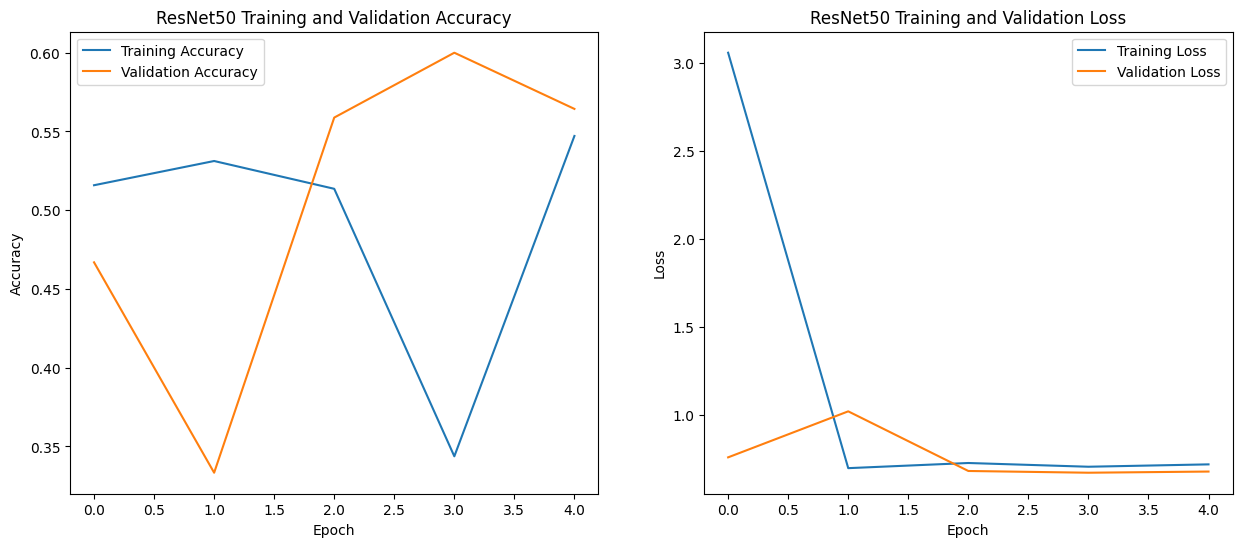

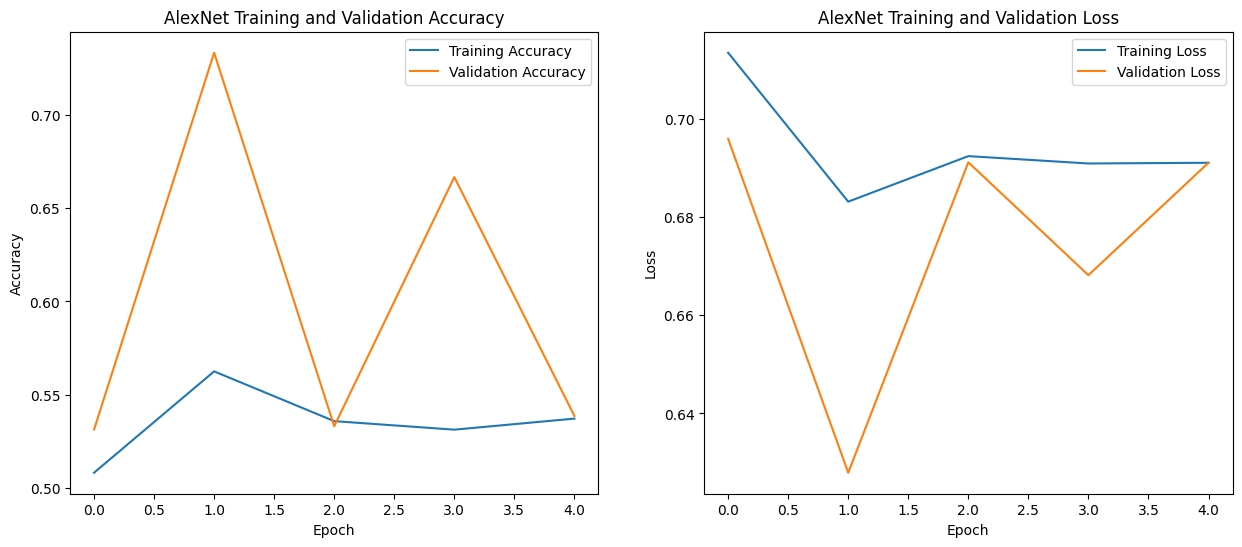

In [ ]:
"""


# Model performansının görselleştirilmesi
plt.figure(figsize=(15, 6))

# ResNet50
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# AlexNet
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history_alexnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_alexnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('AlexNet Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_alexnet.history['loss'], label='Training Loss')
plt.plot(history_alexnet.history['val_loss'], label='Validation Loss')
plt.title('AlexNet Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


"""



# Grafiklerin boyutunu ayarlamak için figür (grafik alanı) oluşturuluyor.
# Burada 15x6 inçlik bir figür oluşturuluyor.
plt.figure(figsize=(15, 6))

# ResNet50 modelinin eğitim ve doğrulama doğruluğu grafiği
plt.subplot(1, 2, 1)  # 1 satır, 2 sütunlu bir yerleşim içinde birinci grafik için alan seçilir
# ResNet50'nin eğitim doğruluğu çizilir
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
# ResNet50'nin doğrulama doğruluğu çizilir
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
# Grafiğe başlık ekler
plt.title('ResNet50 Training and Validation Accuracy')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Accuracy' etiketi ekler
plt.ylabel('Accuracy')
# Eğitim ve doğrulama doğruluklarını gösterecek olan legend (etiketler) ekler
plt.legend()

# ResNet50 modelinin eğitim ve doğrulama kaybı (loss) grafiği
plt.subplot(1, 2, 2)  # 1 satır, 2 sütunlu bir yerleşim içinde ikinci grafik için alan seçilir
# ResNet50'nin eğitim kaybı çizilir
plt.plot(history_resnet.history['loss'], label='Training Loss')
# ResNet50'nin doğrulama kaybı çizilir
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
# Grafiğe başlık ekler
plt.title('ResNet50 Training and Validation Loss')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Loss' etiketi ekler
plt.ylabel('Loss')
# Eğitim ve doğrulama kayıplarını gösterecek olan legend (etiketler) ekler
plt.legend()

# Grafikleri görüntüler
plt.show()

# AlexNet modelinin eğitim ve doğrulama doğruluğu grafiği
plt.figure(figsize=(15, 6))  # AlexNet için 15x6 inçlik yeni bir figür oluşturuluyor

plt.subplot(1, 2, 1)  # 1 satır, 2 sütunlu bir yerleşim içinde birinci grafik için alan seçilir
# AlexNet'in eğitim doğruluğu çizilir
plt.plot(history_alexnet.history['accuracy'], label='Training Accuracy')
# AlexNet'in doğrulama doğruluğu çizilir
plt.plot(history_alexnet.history['val_accuracy'], label='Validation Accuracy')
# Grafiğe başlık ekler
plt.title('AlexNet Training and Validation Accuracy')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Accuracy' etiketi ekler
plt.ylabel('Accuracy')
# Eğitim ve doğrulama doğruluklarını gösterecek olan legend (etiketler) ekler
plt.legend()

# AlexNet modelinin eğitim ve doğrulama kaybı (loss) grafiği
plt.subplot(1, 2, 2)  # 1 satır, 2 sütunlu bir yerleşim içinde ikinci grafik için alan seçilir
# AlexNet'in eğitim kaybı çizilir
plt.plot(history_alexnet.history['loss'], label='Training Loss')
# AlexNet'in doğrulama kaybı çizilir
plt.plot(history_alexnet.history['val_loss'], label='Validation Loss')
# Grafiğe başlık ekler
plt.title('AlexNet Training and Validation Loss')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Loss' etiketi ekler
plt.ylabel('Loss')
# Eğitim ve doğrulama kayıplarını gösterecek olan legend (etiketler) ekler
plt.legend()

# Grafikleri görüntüler
plt.show()




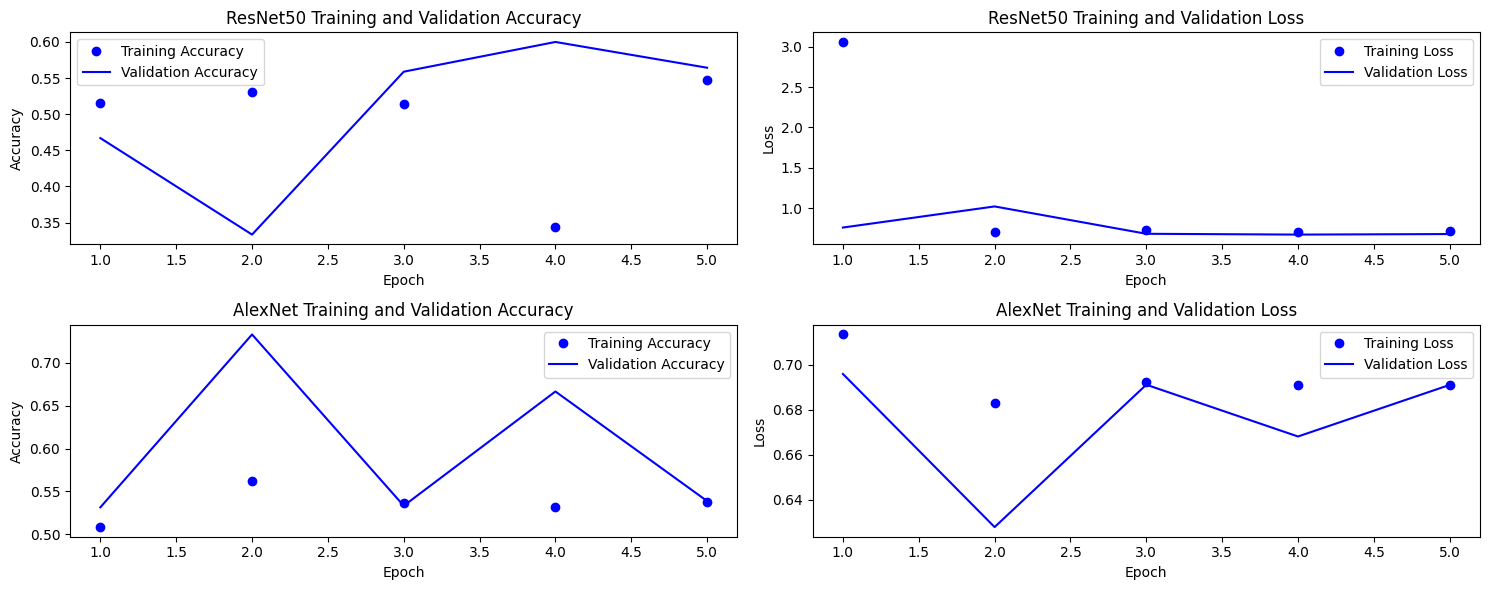

In [ ]:
"""

# Eğitim ve Doğrulama Setlerindeki Kayıp ve Doğruluk Dağılımı
epochs = range(1, len(history_resnet.history['accuracy']) + 1)

plt.figure(figsize=(15, 6))

# ResNet50
plt.subplot(2, 2, 1)
plt.plot(epochs, history_resnet.history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_resnet.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('ResNet50 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, history_resnet.history['loss'], 'bo', label='Training Loss')
plt.plot(epochs, history_resnet.history['val_loss'], 'b', label='Validation Loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# AlexNet
plt.subplot(2, 2, 3)
plt.plot(epochs, history_alexnet.history['accuracy'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_alexnet.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('AlexNet Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, history_alexnet.history['loss'], 'bo', label='Training Loss')
plt.plot(epochs, history_alexnet.history['val_loss'], 'b', label='Validation Loss')
plt.title('AlexNet Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

"""





# Epoch sayısını oluşturuyoruz. Epoch sayısı, 1'den eğitim doğruluklarının ve kayıplarının uzunluğuna kadar olan bir dizi olur.
# Bu, her epoch'un x ekseninde kullanılacak.
epochs = range(1, len(history_resnet.history['accuracy']) + 1)

# Grafiklerin boyutunu ayarlıyoruz. Burada 15x6 inçlik bir figür (grafik alanı) oluşturuyoruz.
plt.figure(figsize=(15, 6))

# ResNet50 modelinin eğitim ve doğrulama doğruluğu grafiklerinin oluşturulması
plt.subplot(2, 2, 1)  # 2 satır, 2 sütunlu bir yerleşim içinde birinci grafik için alan seçilir
# ResNet50'nin eğitim doğruluğunu 'bo' (mavi yuvarlaklar) ile çizeriz.
plt.plot(epochs, history_resnet.history['accuracy'], 'bo', label='Training Accuracy')
# ResNet50'nin doğrulama doğruluğunu 'b' (mavi çizgi) ile çizeriz.
plt.plot(epochs, history_resnet.history['val_accuracy'], 'b', label='Validation Accuracy')
# Grafiğe başlık ekler
plt.title('ResNet50 Training and Validation Accuracy')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Accuracy' etiketi ekler
plt.ylabel('Accuracy')
# Eğitim ve doğrulama doğruluklarını gösterecek olan legend (etiketler) ekler
plt.legend()

# ResNet50 modelinin eğitim ve doğrulama kaybı (loss) grafiklerinin oluşturulması
plt.subplot(2, 2, 2)  # 2 satır, 2 sütunlu bir yerleşim içinde ikinci grafik için alan seçilir
# ResNet50'nin eğitim kaybını 'bo' (mavi yuvarlaklar) ile çizeriz.
plt.plot(epochs, history_resnet.history['loss'], 'bo', label='Training Loss')
# ResNet50'nin doğrulama kaybını 'b' (mavi çizgi) ile çizeriz.
plt.plot(epochs, history_resnet.history['val_loss'], 'b', label='Validation Loss')
# Grafiğe başlık ekler
plt.title('ResNet50 Training and Validation Loss')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Loss' etiketi ekler
plt.ylabel('Loss')
# Eğitim ve doğrulama kayıplarını gösterecek olan legend (etiketler) ekler
plt.legend()

# AlexNet modelinin eğitim ve doğrulama doğruluğu grafiklerinin oluşturulması
plt.subplot(2, 2, 3)  # 2 satır, 2 sütunlu bir yerleşim içinde üçüncü grafik için alan seçilir
# AlexNet'in eğitim doğruluğunu 'bo' (mavi yuvarlaklar) ile çizeriz.
plt.plot(epochs, history_alexnet.history['accuracy'], 'bo', label='Training Accuracy')
# AlexNet'in doğrulama doğruluğunu 'b' (mavi çizgi) ile çizeriz.
plt.plot(epochs, history_alexnet.history['val_accuracy'], 'b', label='Validation Accuracy')
# Grafiğe başlık ekler
plt.title('AlexNet Training and Validation Accuracy')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Accuracy' etiketi ekler
plt.ylabel('Accuracy')
# Eğitim ve doğrulama doğruluklarını gösterecek olan legend (etiketler) ekler
plt.legend()

# AlexNet modelinin eğitim ve doğrulama kaybı (loss) grafiklerinin oluşturulması
plt.subplot(2, 2, 4)  # 2 satır, 2 sütunlu bir yerleşim içinde dördüncü grafik için alan seçilir
# AlexNet'in eğitim kaybını 'bo' (mavi yuvarlaklar) ile çizeriz.
plt.plot(epochs, history_alexnet.history['loss'], 'bo', label='Training Loss')
# AlexNet'in doğrulama kaybını 'b' (mavi çizgi) ile çizeriz.
plt.plot(epochs, history_alexnet.history['val_loss'], 'b', label='Validation Loss')
# Grafiğe başlık ekler
plt.title('AlexNet Training and Validation Loss')
# X eksenine 'Epoch' etiketi ekler
plt.xlabel('Epoch')
# Y eksenine 'Loss' etiketi ekler
plt.ylabel('Loss')
# Eğitim ve doğrulama kayıplarını gösterecek olan legend (etiketler) ekler
plt.legend()

# Alt grafiklerin düzenini sıkıştırarak daha düzgün bir görünüm sağlar
plt.tight_layout()

# Grafikleri görüntüler
plt.show()





In [ ]:

"""


import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

test_image_path='/content/drive/projeee/kanserr/'
img=image.load_img(test_image_path,target_size=(150,150))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0) / 255.0

# Tahmin yap
prediction = model.predict(img_array)
print(prediction)
if prediction[0] > 0.5:
    prediction_label = 'kötü huylu'

else:
   prediction_label = 'iyi huylu'


plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f'Tahmin: {prediction_label}')
plt.axis('off')
plt.show()


"""